### RMIT University Vietnam
# EEET2574 Big Data in Engineering
### -- Assessment: Statistical Analysis --

**Semester:** 2019B
**Author:** Tran Thi Hong Phuong - s3623386 </br>
**Created date:** 25/07/2019 </br>
**Last modified date:** 27/07/2019 </br>

## Question 1

> Using the Iris data set and Pandas library determine the mean, median, variance, and standard deviation for each of the 4 attributes (petal length, petal width sepal length, sepal width) of each the three types of irises (Iris-setosa, Iris-versicolor, Iris-virginica)

In [1]:
import pandas as pd

iris_df = pd.read_csv('iris.csv')
print('Iris dataset shape:', iris_df.shape)
iris_df.head()

Iris dataset shape: (150, 5)


,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Save list of Iris species and attributes
species = list(iris_df['Species'].unique())
attributes = list(iris_df.columns)[:-1]

# Split dataframe species-wise
setosa = iris_df[iris_df['Species'] == 'Iris-setosa'].reset_index(drop=True)
versicolor = iris_df[iris_df['Species'] == 'Iris-versicolor'].reset_index(drop=True)
virginica = iris_df[iris_df['Species'] == 'Iris-virginica'].reset_index(drop=True)

In [3]:
from time import time

def get_stats_df(spec_df):  
    # Create a dataframe to store statistics
    stats_df = pd.DataFrame(columns=attributes, index=['mean', 'median', 'variance', 'stddev'])
    stats_df.loc['mean'] = spec_df.mean()
    stats_df.loc['median'] = spec_df.median()
    stats_df.loc['variance'] = spec_df.var()
    stats_df.loc['stddev'] = spec_df.std()
    
    return stats_df

def run_stats_df(print_results=True):
    elapsed = 0
    # Get statistics for each species
    for spec in [setosa, versicolor, virginica]:
        t0 = time()
        stats_df = get_stats_df(spec_df=spec)
        elapsed += time() - t0

        # Print out results if specified
        if print_results:
            print('Statistics for', spec.loc[0, 'Species'])
            print(stats_df)
            print()

    return elapsed

In [4]:
print(f'Elapsed time: {run_stats_df():.4f}s')

Statistics for Iris-setosa
         Sepal length Sepal width Petal length Petal width
mean            5.006       3.418        1.464       0.244
median              5         3.4          1.5         0.2
variance     0.124249     0.14518    0.0301061   0.0114939
stddev        0.35249    0.381024     0.173511     0.10721

Statistics for Iris-versicolor
         Sepal length Sepal width Petal length Petal width
mean            5.936        2.77         4.26       1.326
median            5.9         2.8         4.35         1.3
variance     0.266433   0.0984694     0.220816   0.0391061
stddev       0.516171    0.313798     0.469911    0.197753

Statistics for Iris-virginica
         Sepal length Sepal width Petal length Petal width
mean            6.588       2.974        5.552       2.026
median            6.5           3         5.55           2
variance     0.404343    0.104004     0.304588   0.0754327
stddev        0.63588    0.322497     0.551895     0.27465

Elapsed time: 0.0359s


## Question 2

> Can you learn anything from these statistics to help classify an iris?

Average `Sepal length` and `Sepal width` among the three irises do not differ much from each other, thus these two attributes may not contribute much to classification. `Petal length` can be used to identify `Iris-setosa` since this attribute in setosa is much smaller than in the other two. `Petal width` seems to be the best distinguisher out of the four attributes because its average value is quite distinct for each iris type.

## Question 3

> How fast was the analysis process? Change the set size and see how the performance changes? What did you find? How long do you estimate it would take if the data set was 10 times larger?

Running time for the whole dataset is produced in **Question 1** section, which is around 0.04 second. Below are experimental runs on different sizes of the dataset.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('husl')

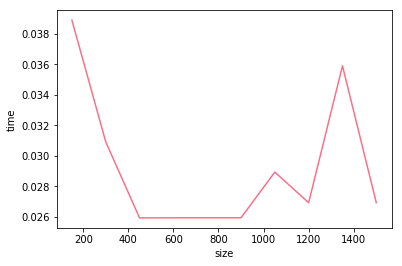

In [6]:
# Generate list of numbers from 1 to 10
n_sizes = list(range(1, 11))
# Initialise dataframe to store running time for each set size
time_df = pd.DataFrame(columns=['size', 'time'])

for size in n_sizes:
    # Create a dataset which is n times bigger than the original
    df = iris_df.copy()
    for i in range(size):
        df = df.append(iris_df, ignore_index=True)
    # Run statistics and keep record of running time
    run_time = run_stats_df(print_results=False)
    time_df = time_df.append({'size': iris_df.shape[0] * size, 'time': run_time}, ignore_index=True)
    
sns.lineplot(x='size', y='time', data=time_df)

As can be seen from the obtained results, the fluctuation in execution time appears to be random, because the increase in size is relatively small for a library optimised for handling large datasets like Pandas. Therefore, although in the last iteration the size is 10 times greater, change in time is only in millisecond.

## Question 4

> Using the Iris data set and Pandas library determine the covariance and correlation coefficients between each of the 4 attributes for each iris type

In [7]:
for spec in [setosa, versicolor, virginica]:
    iris_type = spec.loc[0, 'Species']
    print('-----------', iris_type.upper())
    print('Covariance')
    print(spec.cov())
    print()
    print('Correlation')
    print(spec.corr())
    print()

----------- IRIS-SETOSA
Covariance
              Sepal length  Sepal width  Petal length  Petal width
Sepal length      0.124249     0.100298      0.016139     0.010547
Sepal width       0.100298     0.145180      0.011682     0.011437
Petal length      0.016139     0.011682      0.030106     0.005698
Petal width       0.010547     0.011437      0.005698     0.011494

Correlation
              Sepal length  Sepal width  Petal length  Petal width
Sepal length      1.000000     0.746780      0.263874     0.279092
Sepal width       0.746780     1.000000      0.176695     0.279973
Petal length      0.263874     0.176695      1.000000     0.306308
Petal width       0.279092     0.279973      0.306308     1.000000

----------- IRIS-VERSICOLOR
Covariance
              Sepal length  Sepal width  Petal length  Petal width
Sepal length      0.266433     0.085184      0.182898     0.055780
Sepal width       0.085184     0.098469      0.082653     0.041204
Petal length      0.182898     0.082653  

These covariance and correlation can be visualised using heat map, which is a plot encoding each value in the covariance/correlation matrix above with a color

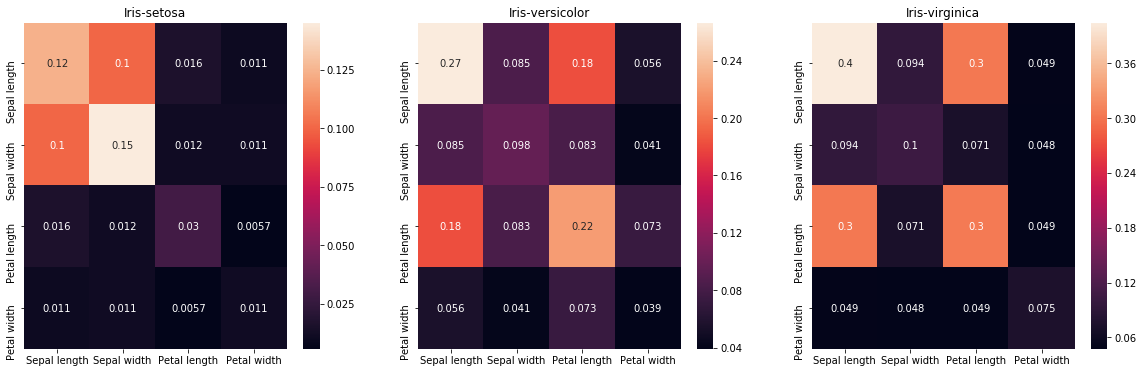

In [8]:
# Covariance heat map
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for idx, spec in enumerate([setosa, versicolor, virginica]):
    ax[idx].set_title(spec.loc[0, 'Species'])
    sns.heatmap(spec.cov(), annot=True, ax=ax[idx])

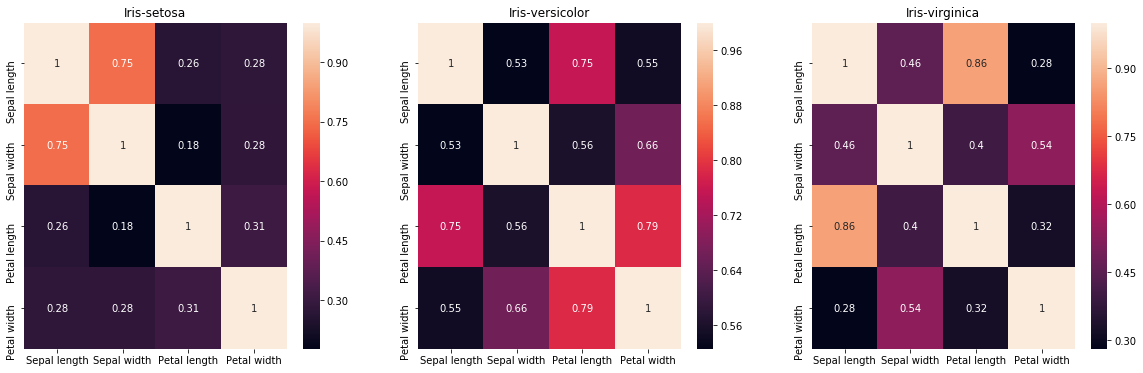

In [9]:
# Correlation heat map
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for idx, spec in enumerate([setosa, versicolor, virginica]):
    ax[idx].set_title(spec.loc[0, 'Species'])
    sns.heatmap(spec.corr(), annot=True, ax=ax[idx])

## Question 5

> Use matplotlib, seaborn etc. to create scatterplots mapping each attribute/value per iris type

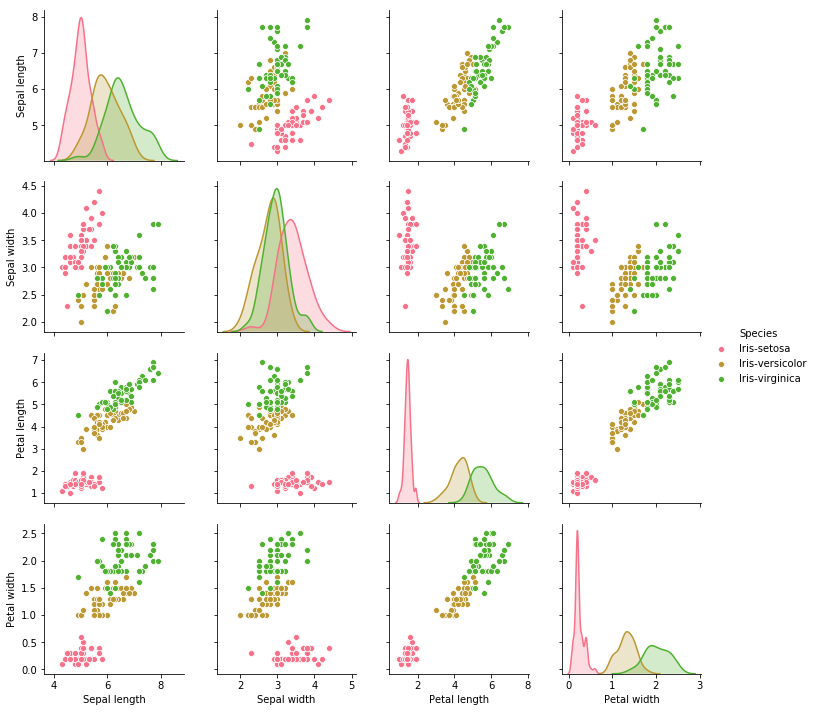

In [10]:
# Generate pairplot with 'Species' columns as color indicator
sns.pairplot(iris_df, hue='Species')

> Can you learn anything from these coefficients to help classify an iris? How does your answer compare to subquestion 2 above?

The visualisation above further supports the deduction provided in **Question 2** that Setosa can be clearly distinguished from the other two types of irises, while Versicolor and Virginica still have a number of overlapping instances.

## Question 6

> How fast was the analysis process? Change the set size and see how the performance changes? What did you find? How long do you estimate it would take if the data set was 10 times larger?

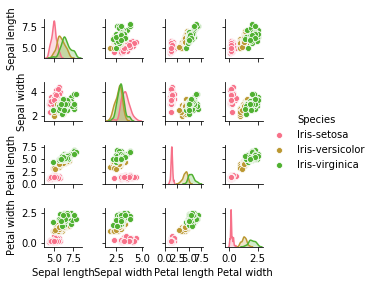

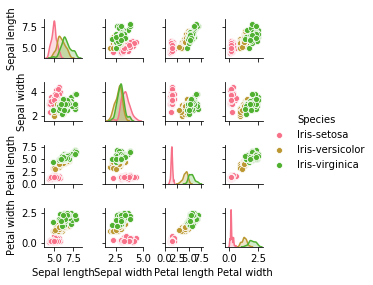

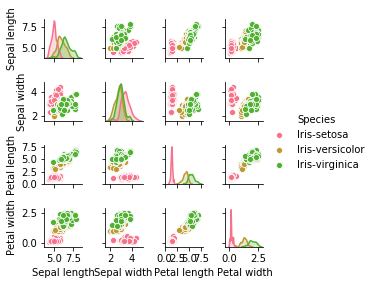

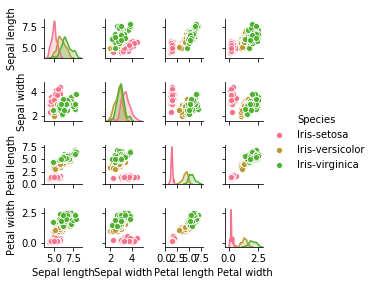

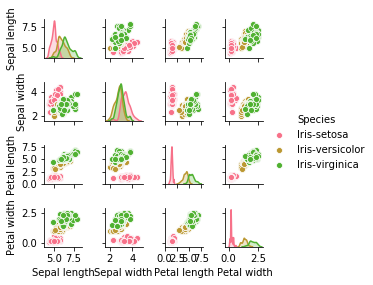

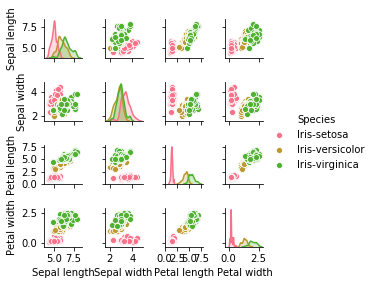

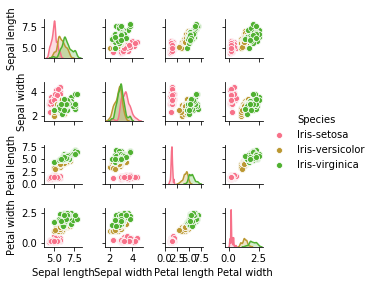

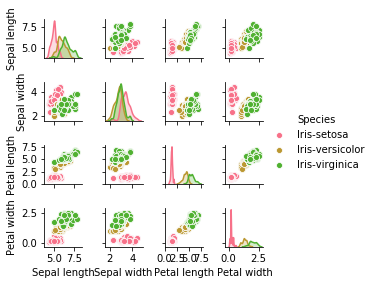

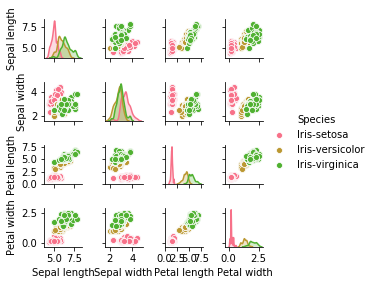

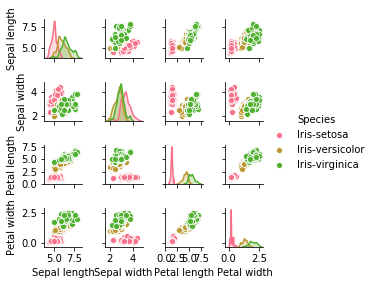

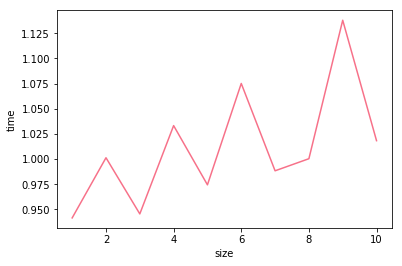

In [11]:
# Generate list of numbers from 1 to 10
n_sizes = list(range(1, 11))
time_df = pd.DataFrame(columns=['size', 'time'])

for size in n_sizes:
    # Create a dataset which is n times bigger than the original
    df = iris_df.copy()
    for i in range(size):
        df = df.append(iris_df, ignore_index=True)
        
    # Run plotting and keep track of running time
    t0 = time()
    sns.pairplot(df, hue='Species', height=1)
    time_df = time_df.append({'size': size, 'time': time() - t0}, ignore_index=True)

# Plot results
plt.figure()    
sns.lineplot(x='size', y='time', data=time_df)
plt.show()

Similar to the results generated in **Question 3**, since the size of this Iris dataset is small, the execution time does not change much as the set size increases up to 10 times greater.

## Question 7

> What other visualization tools could you have used? Do you think they could have made the analysis clearer?

Up to this part, only scatter plots and line plots are used. There are other types of plot that can be used to draw insights from this dataset. In particular, the following experiments will look into ...

### Pie chart

This type of plot is used to illustrate the percentage breakdown of different categorical values in data. This can be used on `Species` attribute to to show the proportion of each iris type within the dataset and determine if the dataset is balanced or biased.

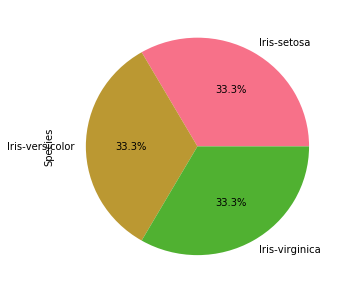

In [12]:
iris_df['Species'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5, 5))

As can be seen from the pie chart above, the dataset is perfectly balanced among the three classes of iris.

### Box and Whiskers

This type of plot is used to demonstrate the five number summary: the minimum, Q1 (1st quartile or 25% mark), the median, Q3 (3rd quartile or 75% mark), the maximum.

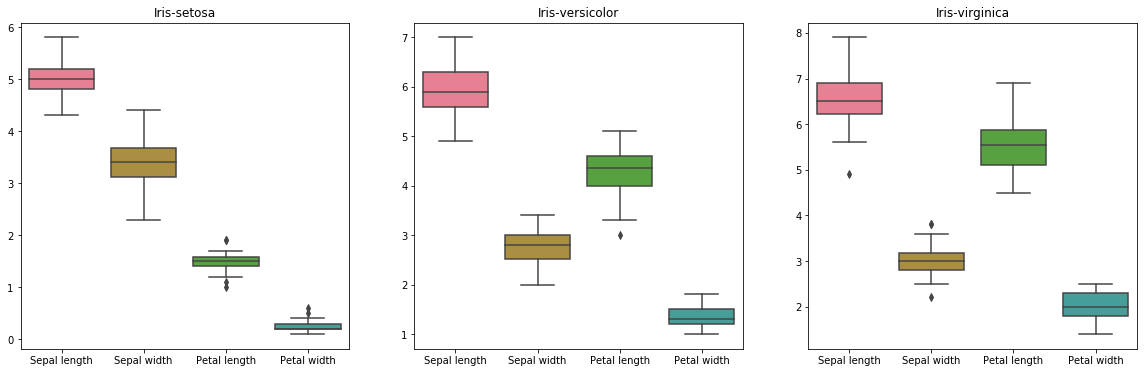

In [13]:
# Generate placeholders for three plots for three classes
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, spec in enumerate([setosa, versicolor, virginica]):
    axes[idx].set_title(spec.loc[0, 'Species'])
    sns.boxplot(data=spec, ax=axes[idx])

The statistical summary for Setosa is evidently different from the other two. While quite similar in distribution of each attribute, Versicolor and Virginica are different in value range, in particular, each attribute of Virginica is generally longer than that of Versicolor.

### Histogram

This type of plot shows the distribution of the dataset, the frequency of each value range.

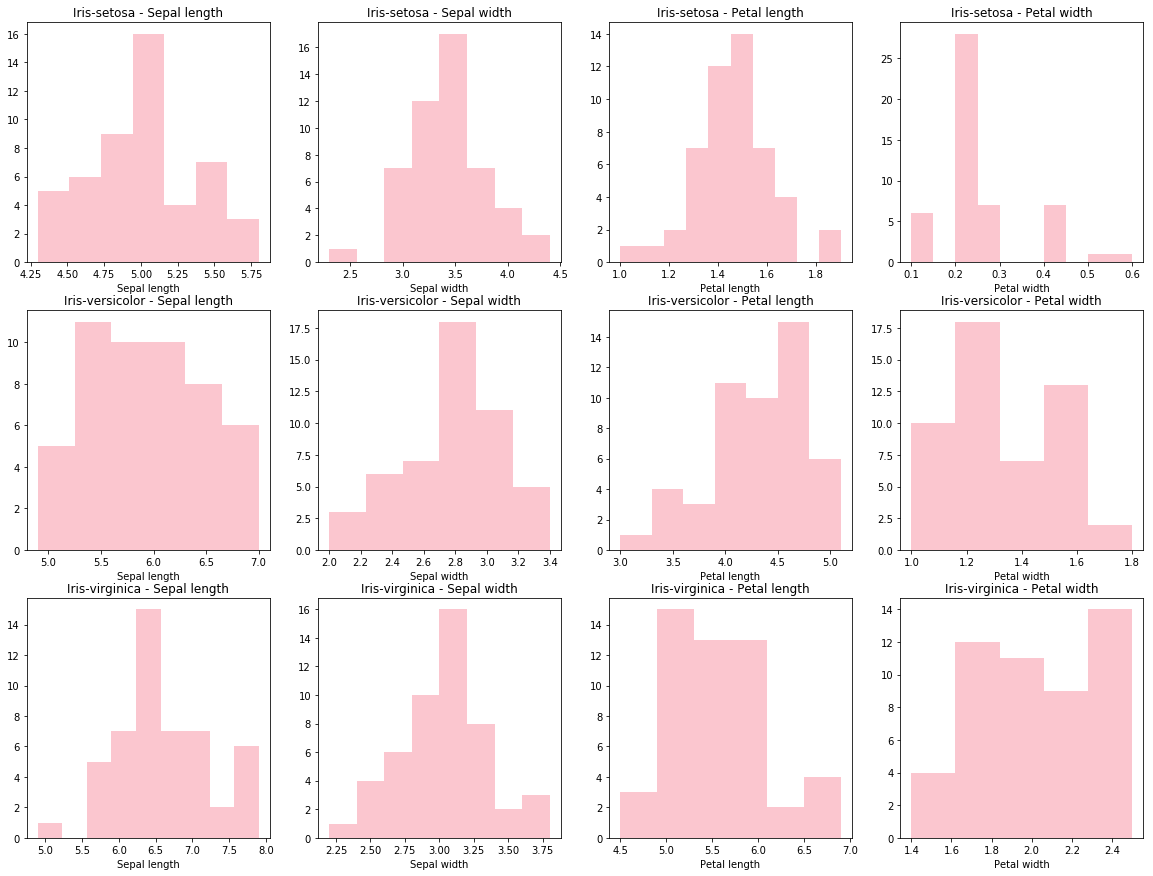

In [14]:
# Generate placeholders for three plots for three classes
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for idx_row, spec in enumerate([setosa, versicolor, virginica]):
    # Each row correponds to each iris type
    for idx_col, attr in enumerate(attributes):
        # Each column corresponds to each attribute
        axes[idx_row, idx_col].set_title('{} - {}'.format(spec.loc[0, 'Species'], attr))
        sns.distplot(spec[attr], ax=axes[idx_row, idx_col], kde=False)

Most attributes have normal distribution, such as `Setosa - Petal length` and `Virginica - Sepal width`. Some attributes are left-skewed (`Versicolor - Petal length`) or right-skewed (`Setosa - Petal width`)

### Violin plot

Violin plot is quite similar to box and whiskers, but is believed to be superior because in addition to the five number summary, it also shows the data density, or the frequency of each value. In another word, it is a combination of box plot and density plot.

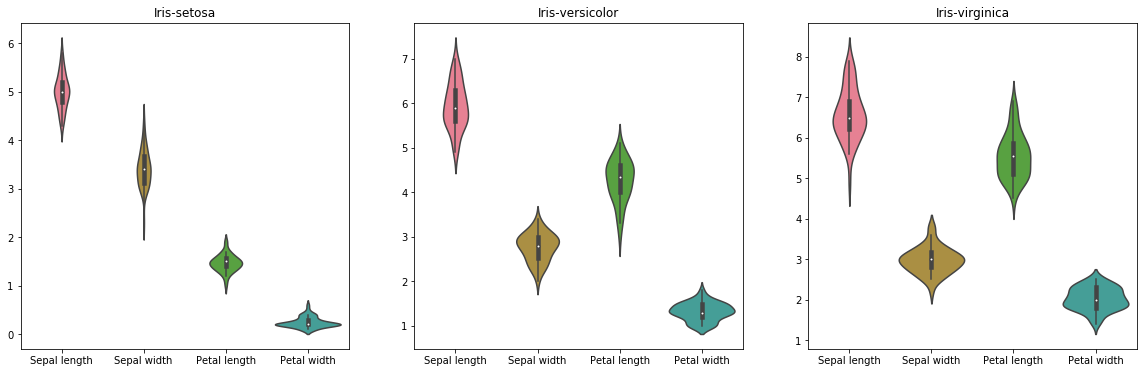

In [15]:
# Generate placeholders for three plots for three classes
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, spec in enumerate([setosa, versicolor, virginica]):
    axes[idx].set_title(spec.loc[0, 'Species'])
    sns.violinplot(data=spec, ax=axes[idx])